In [3]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [4]:
df1=pd.read_csv(r"D:\Guvi Projects\Singapore Resale Flat Prices Prediction\Data\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"D:\Guvi Projects\Singapore Resale Flat Prices Prediction\Data\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"D:\Guvi Projects\Singapore Resale Flat Prices Prediction\Data\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"D:\Guvi Projects\Singapore Resale Flat Prices Prediction\Data\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"D:\Guvi Projects\Singapore Resale Flat Prices Prediction\Data\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
928431,2024-06,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988,800000.0,63 years 03 months
928432,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63 years 01 month
928433,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61 years
928434,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months


In [5]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,928436.0,95.689986,25.823468,28.0,73.0,93.0,113.0,307.0
lease_commence_date,928436.0,1988.288104,10.675957,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,928436.0,321155.159115,170821.607669,5000.0,193000.0,298000.0,418000.0,1588000.0


In [7]:
df['resale_price'].value_counts()

resale_price
300000.0    6925
350000.0    6854
280000.0    6550
320000.0    6530
400000.0    6294
            ... 
941000.0       1
802588.0       1
753500.0       1
508999.0       1
882880.0       1
Name: count, Length: 9534, dtype: int64

## Data Cleaning

In [8]:
df.nunique()

month                   414
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9534
remaining_lease         726
dtype: int64

In [9]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

## REMAINING_LEASE

In [10]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [11]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [12]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
928431,2024-06,YISHUN,EXECUTIVE,351,YISHUN AVE 11,04 TO 06,146.0,Maisonette,1988,800000.0,63.250000
928432,2024-06,YISHUN,EXECUTIVE,328,YISHUN RING RD,04 TO 06,142.0,Apartment,1988,850000.0,63.083333
928433,2024-06,YISHUN,EXECUTIVE,723,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,790000.0,61.000000
928434,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.666667
928435,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62.666667


In [13]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711643
95.000000      2397
67.000000      2212
69.000000      1914
71.000000      1763
              ...  
97.583333         1
97.750000         1
97.416667         1
97.250000         1
41.500000         1
Name: count, Length: 673, dtype: int64

In [14]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

## Wrong Format

In [15]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [16]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [17]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
928434,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.666667,2024,06,10,12
928435,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,1000000.0,62.666667,2024,06,4,6


In [18]:
df.drop('storey_range', axis = 1, inplace= True)

In [19]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [20]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [21]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

## TEXT ERRORS

In [22]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [23]:
df['town'].value_counts()

town
TAMPINES           80073
YISHUN             70163
JURONG WEST        66772
BEDOK              66720
WOODLANDS          65614
ANG MO KIO         52137
HOUGANG            50834
BUKIT BATOK        44500
CHOA CHU KANG      38397
BUKIT MERAH        34420
PASIR RIS          33251
SENGKANG           32561
TOA PAYOH          31584
QUEENSTOWN         28802
GEYLANG            28210
CLEMENTI           28064
BUKIT PANJANG      27730
KALLANG/WHAMPOA    27235
JURONG EAST        24815
SERANGOON          22855
BISHAN             21281
PUNGGOL            20738
SEMBAWANG          13891
MARINE PARADE       8046
CENTRAL AREA        7158
BUKIT TIMAH         2521
LIM CHU KANG          64
Name: count, dtype: int64

In [24]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352897
3 ROOM              296306
5 ROOM              195745
EXECUTIVE            69762
2 ROOM               11879
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [25]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [26]:
df['flat_type'].value_counts()

flat_type
4 ROOM              352897
3 ROOM              296306
5 ROOM              195745
EXECUTIVE            69762
2 ROOM               11879
1 ROOM                1304
MULTI GENERATION       543
Name: count, dtype: int64

In [27]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17616
BEDOK RESERVOIR RD    14734
ANG MO KIO AVE 10     13824
ANG MO KIO AVE 3      12164
HOUGANG AVE 8          9372
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [28]:
df['flat_model'].value_counts()

flat_model
Model A                   195248
Improved                  168556
New Generation            110251
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46919
Simplified                 34325
Apartment                  25628
Standard                   25204
SIMPLIFIED                 23258
Maisonette                 17494
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10151
APARTMENT                   9901
DBSS                        3319
Adjoined flat               1253
Model A-Maisonette          1097
MODEL A-MAISONETTE           982
Terrace                      447
Type S1                      437
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      217
2-room                       122
Premium Apartment Loft       108
Premium Maisonette            86
Improved-Maisonette           82

In [29]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [30]:
df['flat_model'].value_counts()

flat_model
Model A                   265629
Improved                  242145
New Generation            189149
Simplified                 57583
Premium Apartment          46925
Standard                   42579
Apartment                  35529
Maisonette                 29709
Model A2                   10151
DBSS                        3319
Model A-Maisonette          2079
Adjoined flat               1253
Terrace                      694
Multi Generation             543
Type S1                      437
Type S2                      217
2-room                       143
Improved-Maisonette          126
Premium Apartment Loft       108
Premium Maisonette            86
3Gen                          32
Name: count, dtype: int64

## Duplicates

In [31]:

df.duplicated().sum()

np.int64(2347)

In [32]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [33]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols


['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [34]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

## Using Boxplot

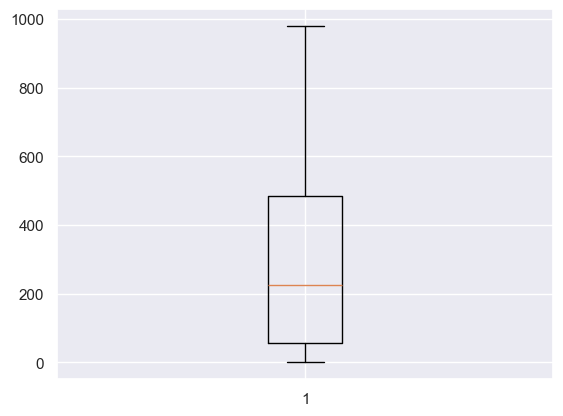

In [35]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [36]:
        # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-586.0), np.float64(1126.0))

In [37]:
df.block = df.block.clip(lower_bound , upper_bound)

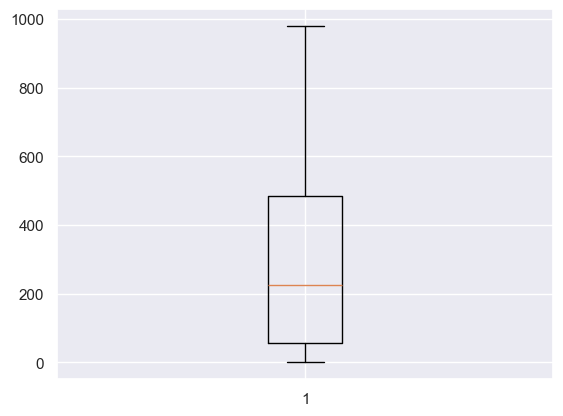

In [38]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

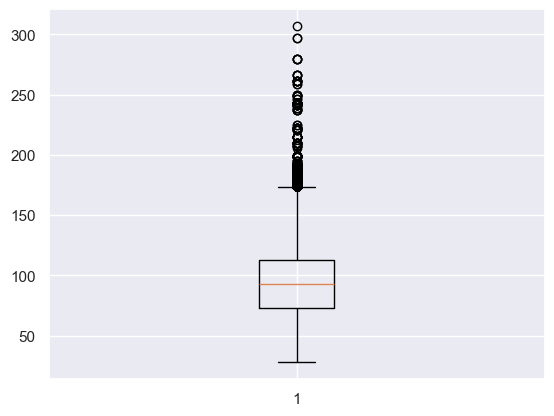

In [39]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [40]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(13.0), np.float64(173.0))

In [41]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

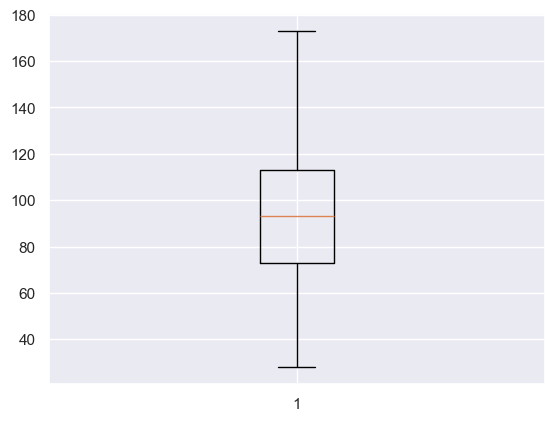

In [42]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

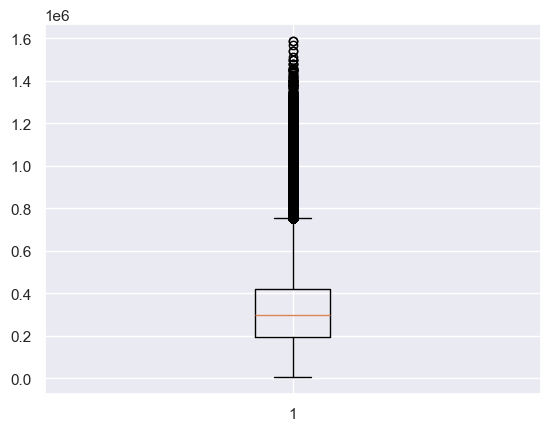

In [43]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [44]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-143250.0), np.float64(754750.0))

In [45]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

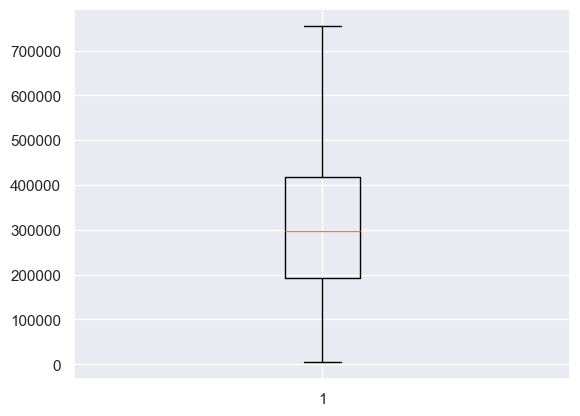

In [46]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

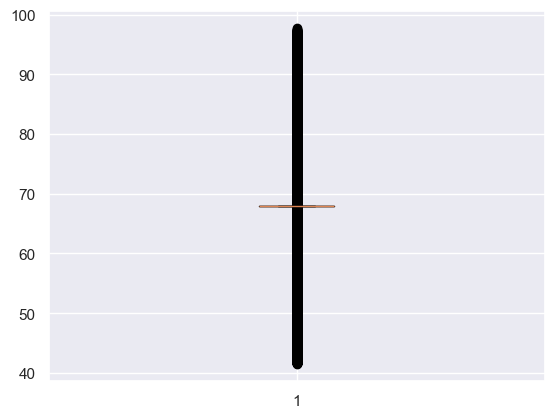

In [47]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [48]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(68.0), np.float64(68.0))

In [49]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

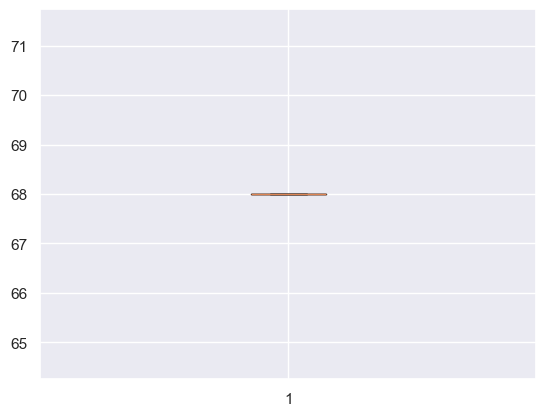

In [50]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

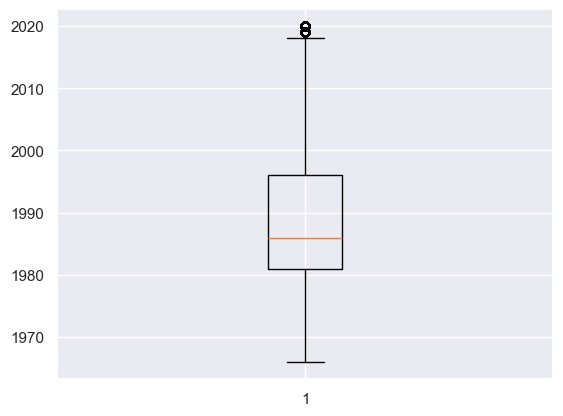

In [51]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [52]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(1958.5), np.float64(2018.5))

In [53]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

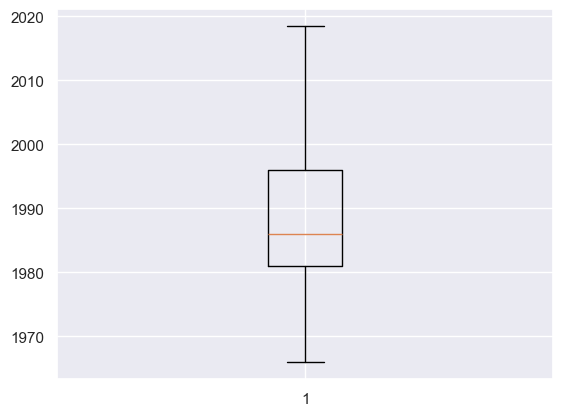

In [54]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

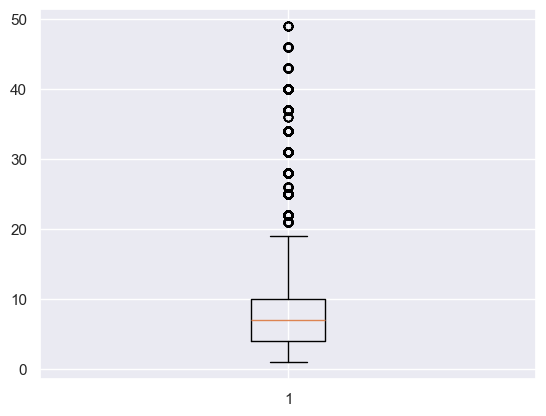

In [55]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [56]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-5.0), np.float64(19.0))

In [57]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

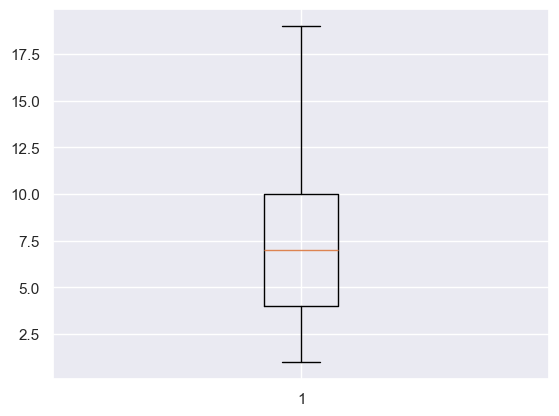

In [58]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

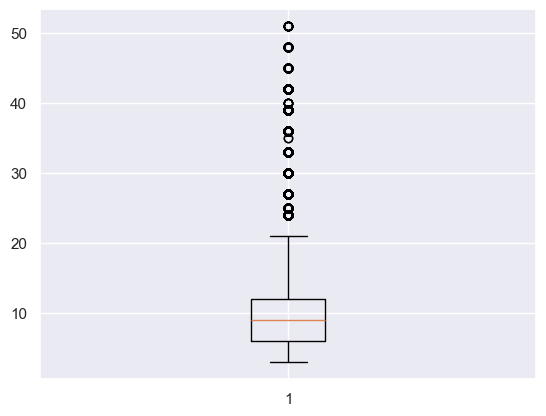

In [59]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [60]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-3.0), np.float64(21.0))

In [61]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

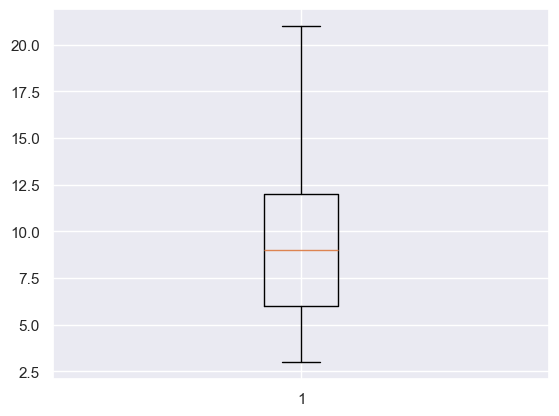

In [62]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

## EDA - EXPLORATARY DATA ANALYSIS
### Categorical Vs Frequency using BarPlot

In [63]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

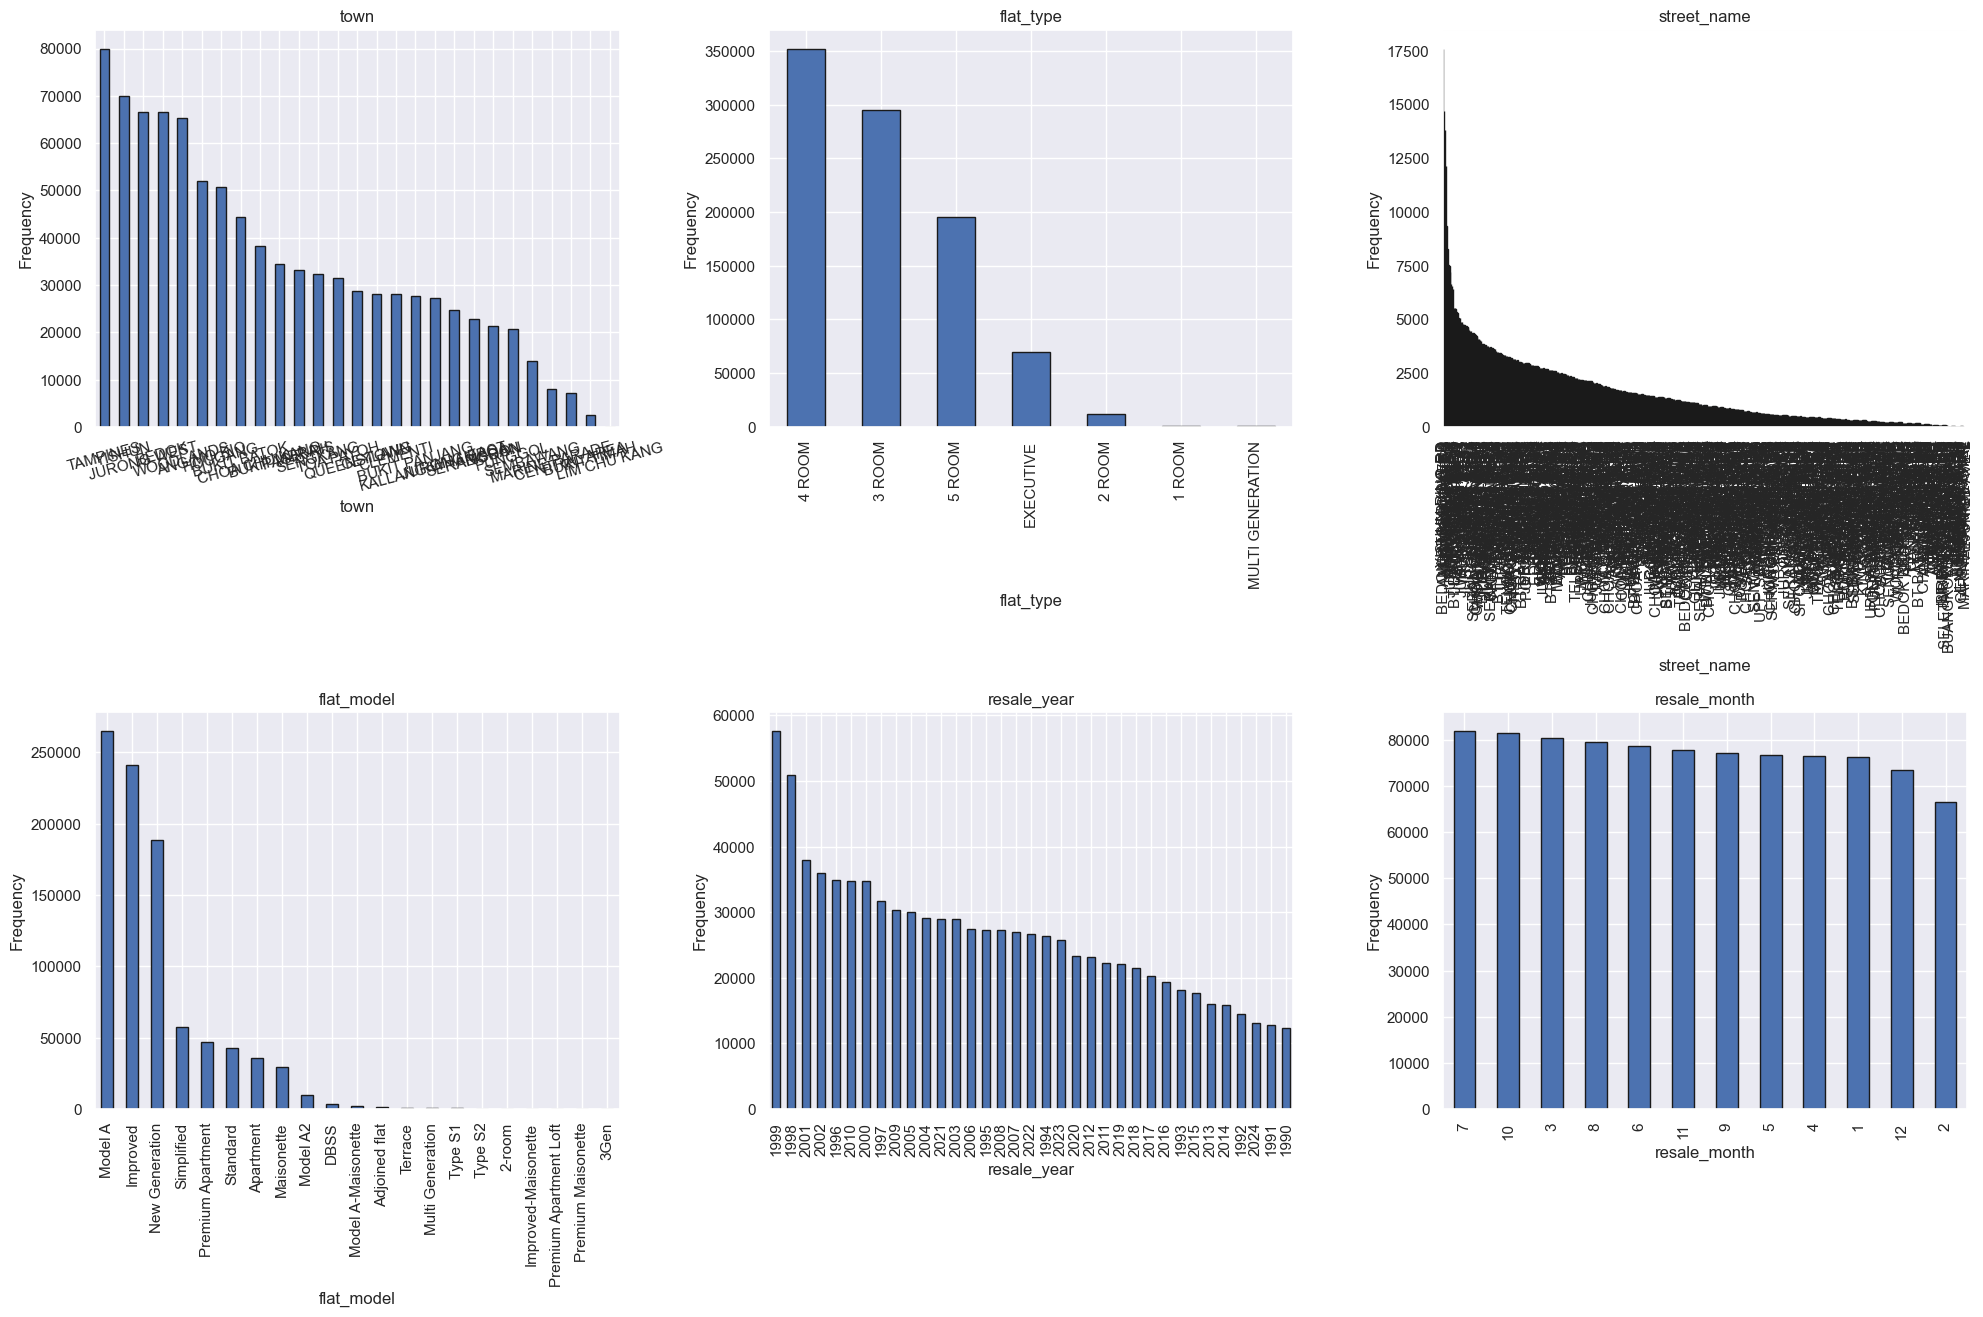

In [64]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature Vs Target (Categorical Data )

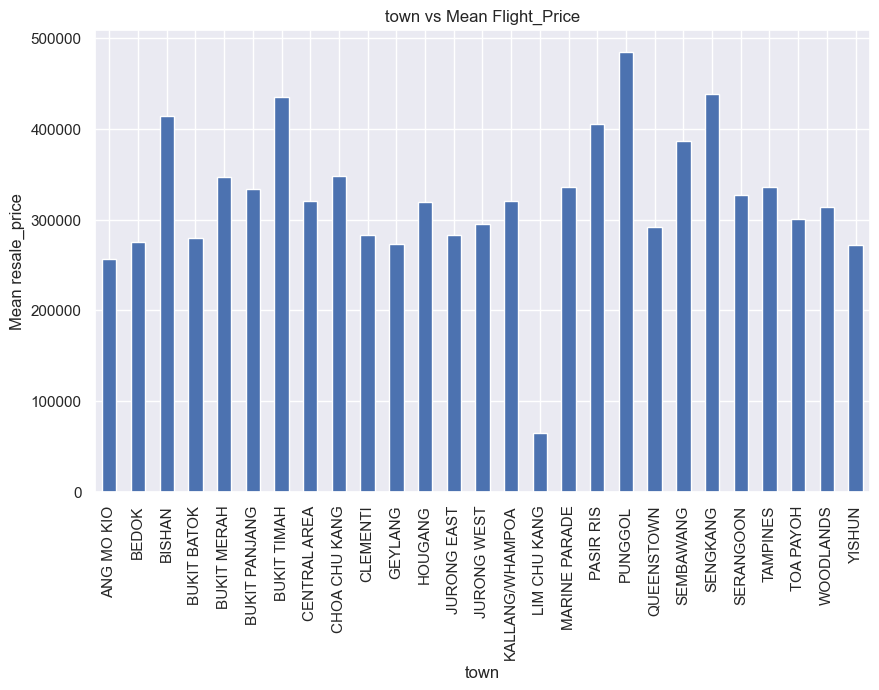

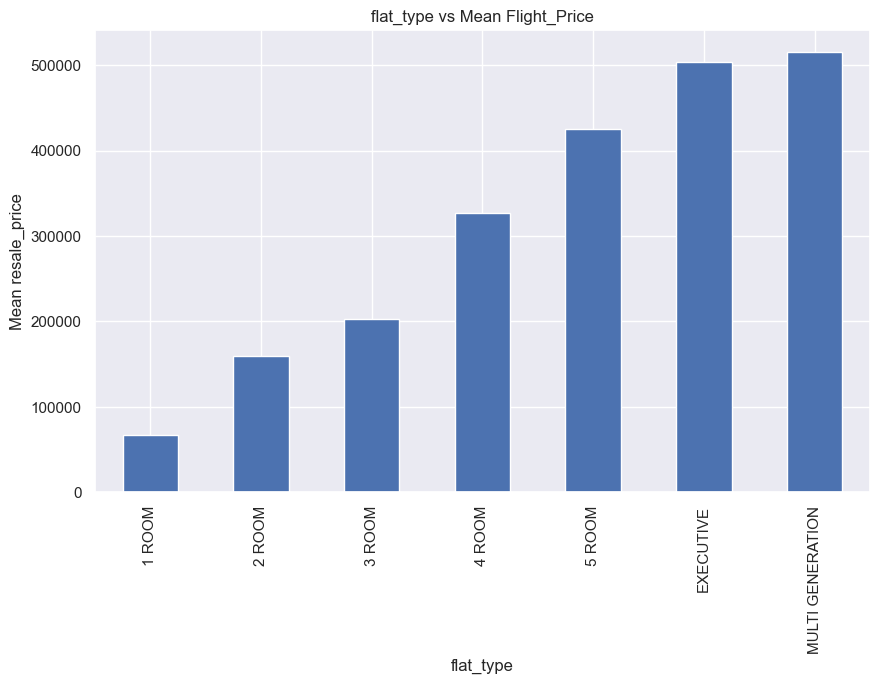

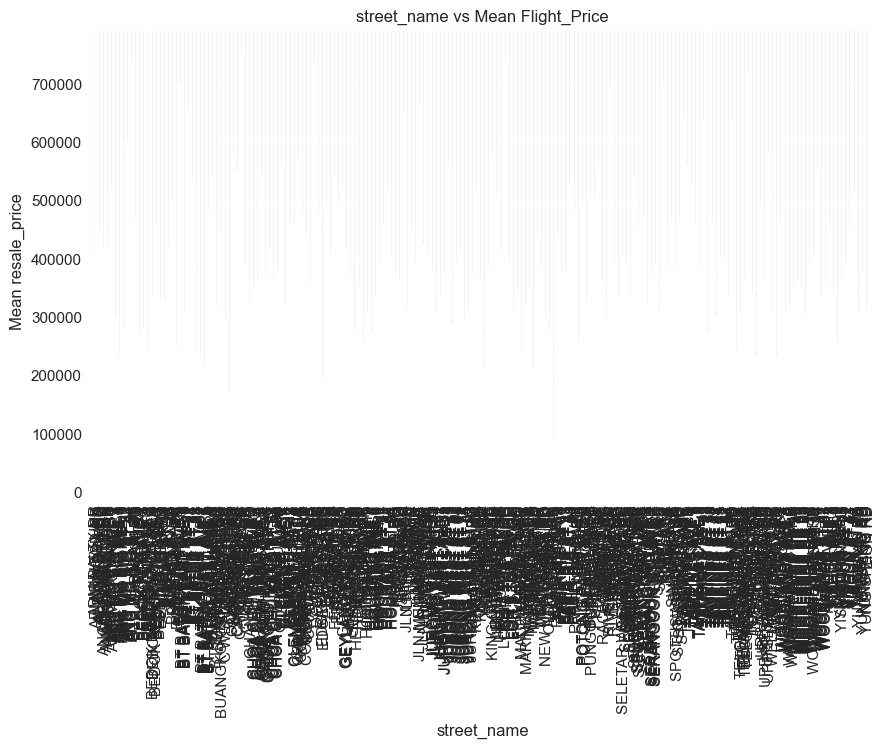

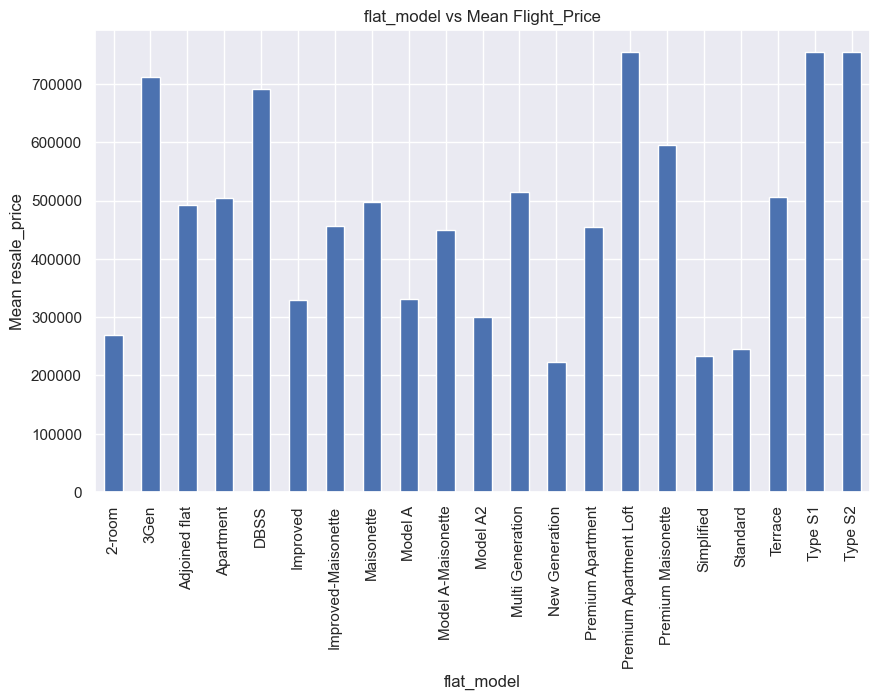

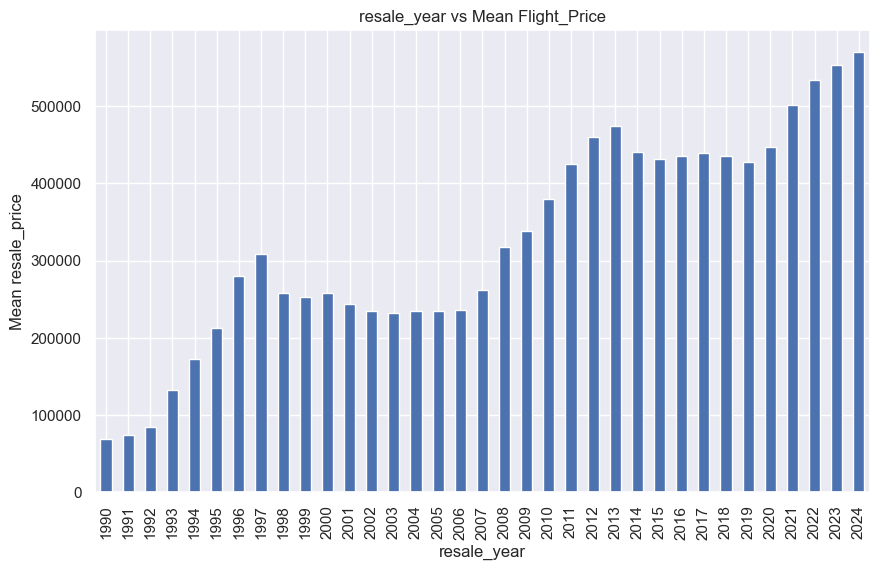

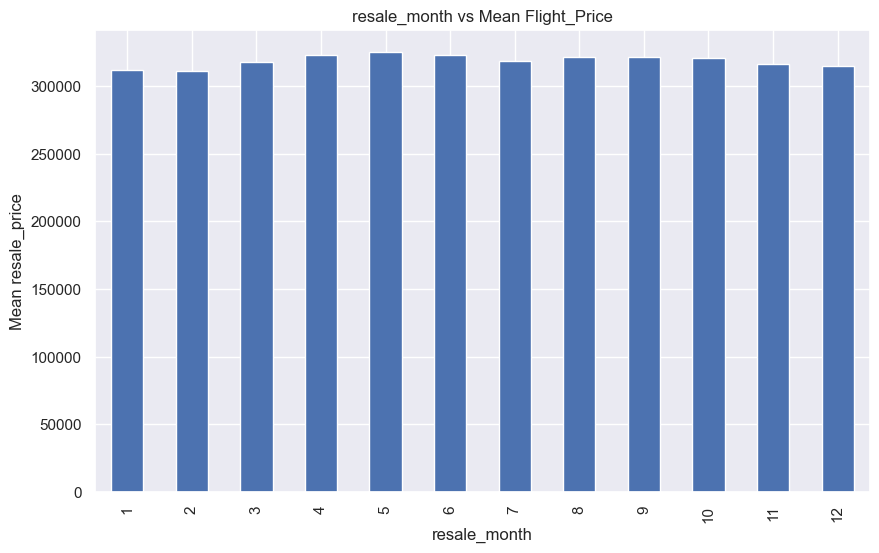

In [65]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

## Feature Vs Target (Condinues Data )

In [66]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [67]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

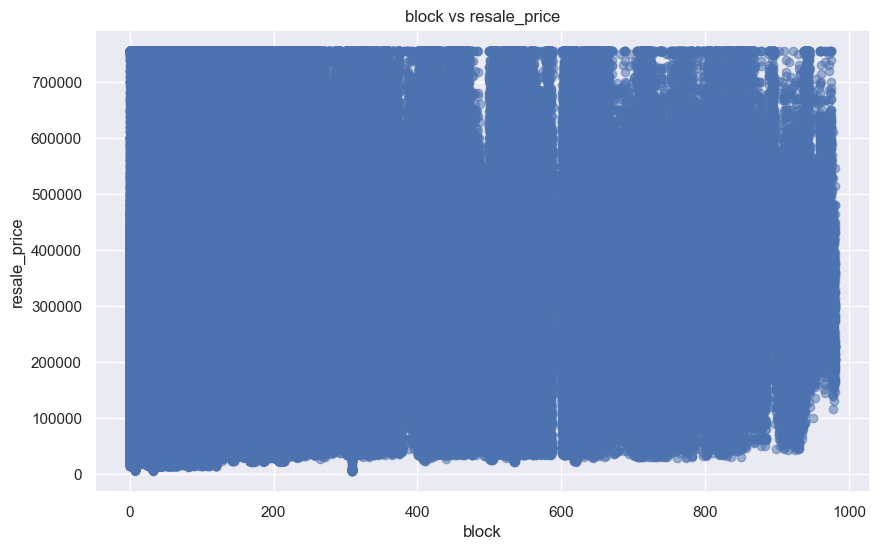

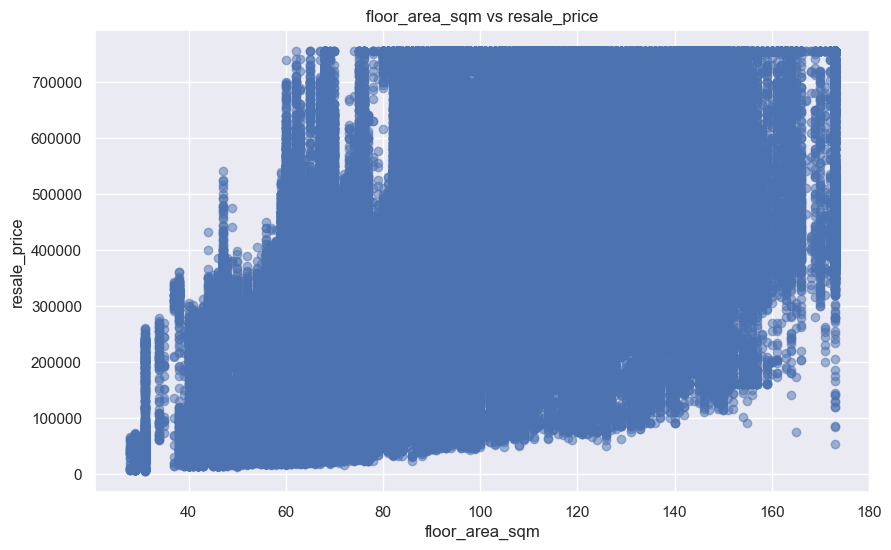

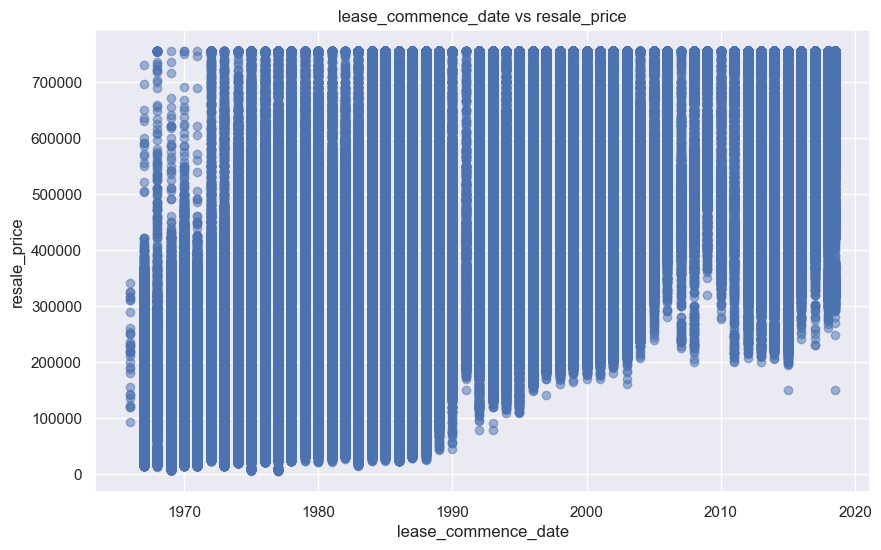

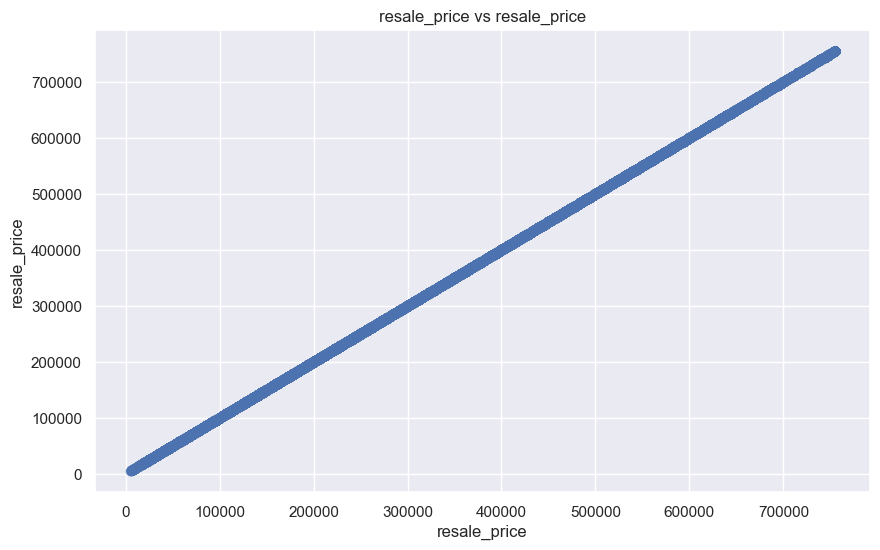

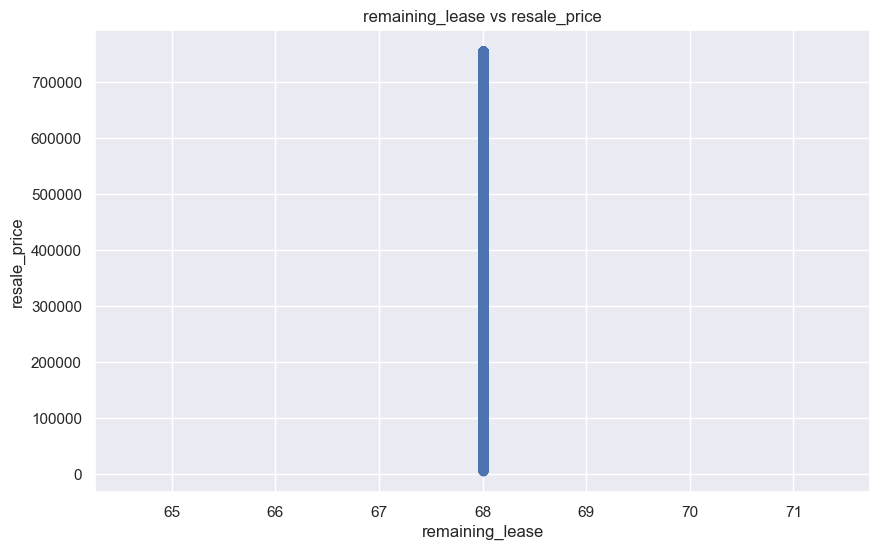

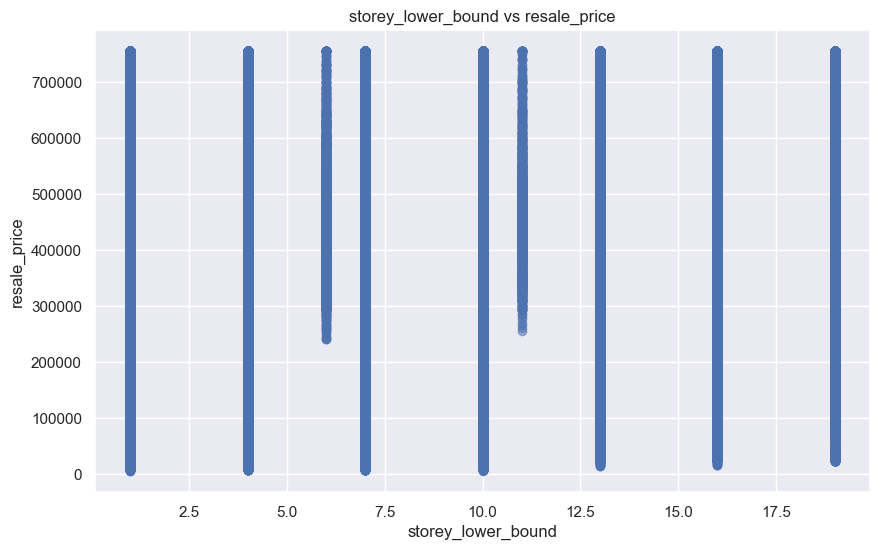

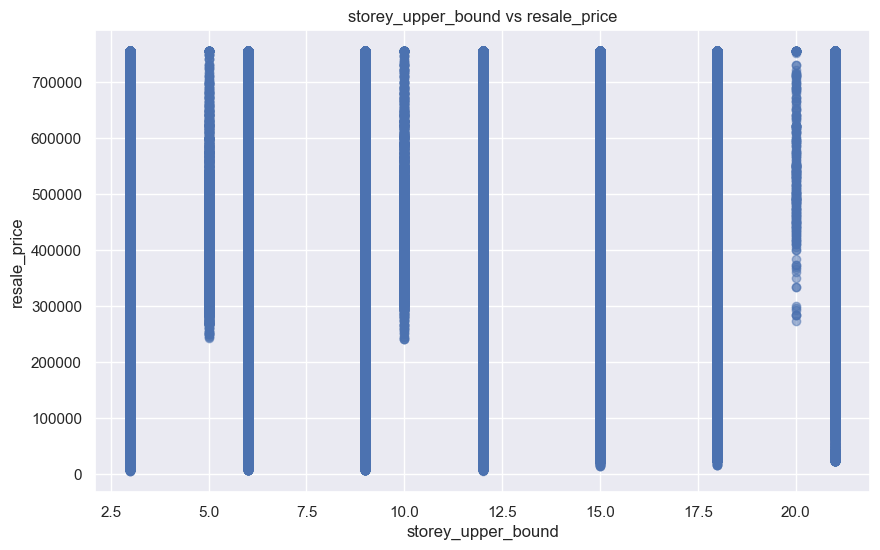

In [68]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

### Encoding Categorical Variables

In [69]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [70]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [71]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [72]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [73]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [74]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [75]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [76]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [77]:
# save the processed data for the deployment
df1.to_csv('final.csv')

## Correlation

In [78]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208344,0.050383,0.587115,0.201138,0.163764,0.333214,0.123383,NaN,0.124004,0.003893,-0.019103,-0.018840
flat_type,0.208344,1.000000,0.127862,0.386753,0.954852,0.242433,0.408278,0.599778,NaN,0.100834,0.003391,0.077467,0.077799
block,0.050383,0.127862,1.000000,0.046583,0.187832,-0.003031,0.003642,-0.082992,NaN,-0.116564,0.002320,-0.124774,-0.124810
street_name,0.587115,0.386753,0.046583,1.000000,0.355645,0.354194,0.737701,0.379108,NaN,0.317368,0.006091,0.081720,0.082357
floor_area_sqm,0.201138,0.954852,0.187832,0.355645,1.000000,0.200353,0.386325,0.574281,NaN,0.062580,0.002851,0.043724,0.043913
flat_model,0.163764,0.242433,-0.003031,0.354194,0.200353,1.000000,0.355740,0.245828,NaN,0.162404,0.001514,0.019985,0.020343
lease_commence_date,0.333214,0.408278,0.003642,0.737701,0.386325,0.355740,1.000000,0.543681,NaN,0.430988,0.003246,0.153851,0.154251
resale_price,0.123383,0.599778,-0.082992,0.379108,0.574281,0.245828,0.543681,1.000000,NaN,0.683761,0.004826,0.209948,0.212602
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.124004,0.100834,-0.116564,0.317368,0.062580,0.162404,0.430988,0.683761,NaN,1.000000,-0.026255,0.096622,0.098660


## Heatmap

<Axes: >

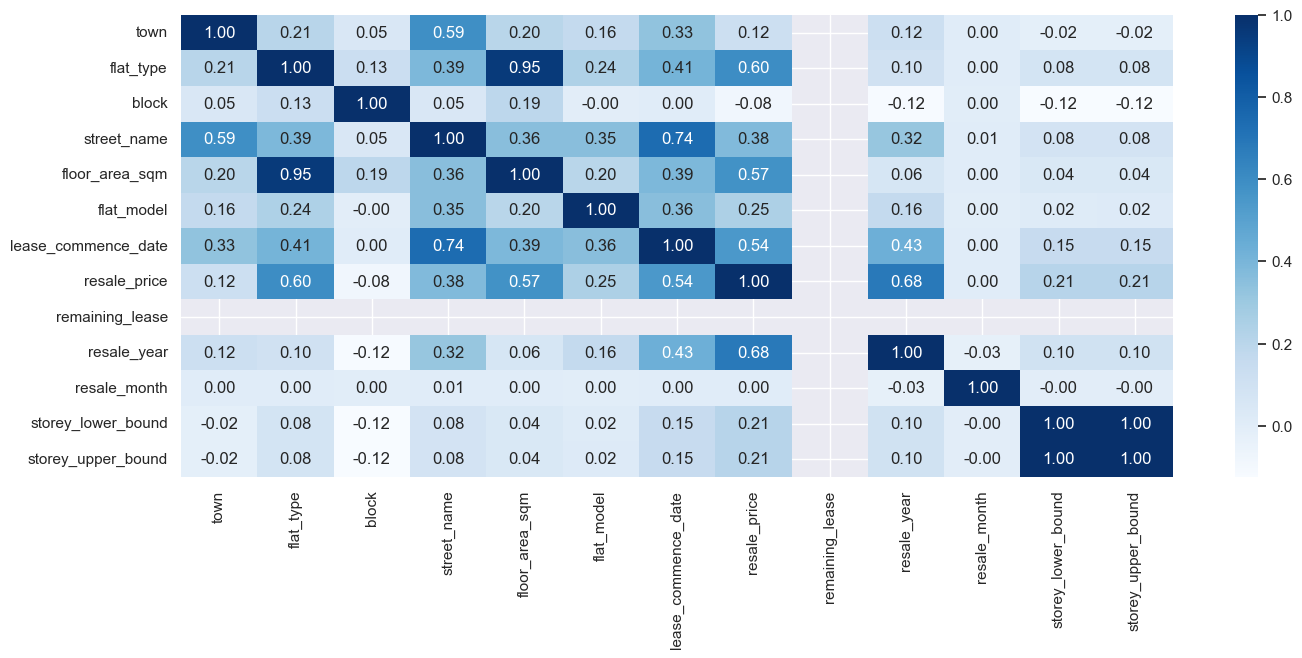

In [79]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

## RIGHT TO MEACHIN LEARNING

### Split

In [80]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(740871, 12) (185218, 12) (740871,) (185218,)


### Scaling

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-1.49557028,  1.03906016, -1.06161639, ...,  1.01147973,
          0.76751947,  0.76440661],
        [ 0.29979743, -1.07003886, -1.0996912 , ..., -1.62635184,
          2.7892072 ,  2.78645789],
        [ 0.29979743, -0.01548935, -0.97785182, ..., -0.16088985,
          0.09362356,  0.09038951],
        ...,
        [ 1.45396239,  1.03906016, -0.18970336, ..., -0.16088985,
          1.44141538,  1.4384237 ],
        [ 0.29979743, -0.01548935, -0.76082543, ...,  0.42529494,
          1.44141538,  1.4384237 ],
        [-1.23908918, -0.01548935,  0.44614588, ...,  0.71838734,
         -0.58027235, -0.58362758]]),
 array([[-1.23908918, -0.01548935,  0.04636043, ..., -0.16088985,
         -0.58027235, -0.58362758],
        [-1.36732973, -0.01548935, -0.67325338, ...,  0.71838734,
         -0.58027235, -0.58362758],
        [ 0.94100019, -0.01548935,  1.7901865 , ...,  0.13220254,
         -1.25416825, -1.25764468],
        ...,
        [ 0.04331633, -1.07003886, -1.10349868, ..., -

### Model_Fit

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Linear Regression

In [83]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[257663.46340927 192221.14668419 421739.66825886 ... 360150.93191244
 236197.35285233 169983.52922251]
300805    226000.0
100335    280000.0
821351    320000.0
492484    280000.0
674780    448000.0
            ...   
414835    282000.0
59529     150000.0
919017    343000.0
624220    215000.0
74734     223000.0
Name: resale_price, Length: 185218, dtype: float64


In [84]:
linear_model.score(X_test, y_test)

0.7926119867683161

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

np.float64(0.7920005220719476)

## K Nearest Neighbor Regression

In [86]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28935.860218812424
Mean Squared Error (MSE)     : 1777592316.0582047
Root Mean Square Error (RMSE): 42161.50277276896
R-squared (R2) Score         : 0.9332464644346694


## Decision Tree Regression

In [87]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17508.716206934376
Mean Squared Error (MSE)     : 674718501.4384398
Root Mean Square Error (RMSE): 25975.344106256605
R-squared (R2) Score         : 0.9746624436461151


## Random Forest Regression

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13903.720803741255
Mean Squared Error (MSE)     : 402265050.0434363
Root Mean Square Error (RMSE): 20056.546313945386
R-squared (R2) Score         : 0.9848938285330185


## Xg Boost Regression

In [89]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16713.003586241895
Mean Squared Error (MSE)     : 546896697.3102784
Root Mean Square Error (RMSE): 23385.822570743123
R-squared (R2) Score         : 0.9794625079076522


## Finalizeing Models

In [90]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9332464644346694
DecisionTreeRegressor 0.9746624436461151
RandomForestRegressor 0.9848938285330185
XGBRegressor 0.9794625079076522

Model: RandomForestRegressor contain Maximum R2_Score: 0.9848938285330185 


## Suggestion

In [91]:
rf_regressor.feature_importances_

array([0.04192932, 0.05215009, 0.01448026, 0.02384737, 0.27736135,
       0.0077618 , 0.03216362, 0.        , 0.53280968, 0.00647822,
       0.00467984, 0.00633846])

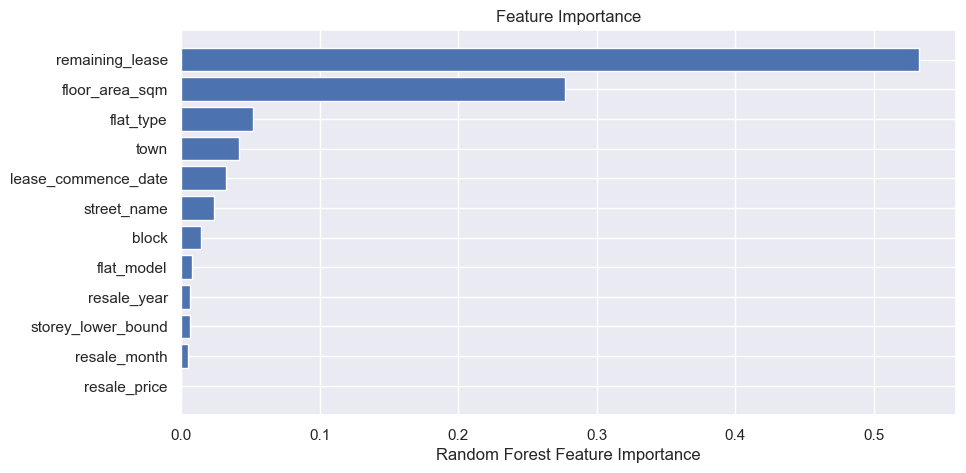

In [92]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

## Save the model

In [93]:
model=rf_regressor.fit(X_train, y_train)
model

RandomForestRegressor(random_state=42)

In [94]:
import pickle


# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


## Predicting

In [95]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
357416,2,4,130.0,21,92.0,15,1978.0,229000.0,68.0,2001,12,13,15
114890,22,5,644.0,288,123.0,14,1988.0,340000.0,68.0,1996,1,1,3
898175,21,4,2.0,443,100.0,16,1997.0,449000.0,68.0,2023,4,1,3
523980,16,3,32.0,175,59.0,14,1974.0,213000.0,68.0,2007,6,7,9
731357,25,4,616.0,468,90.0,29,2002.0,350000.0,68.0,2016,4,13,15


In [96]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

## Resale Price

In [97]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([228045.        , 347145.        , 455408.88      , 204174.57142857,
       358530.21333333])